In [1]:
import torch
import torch.distributions as dist
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

sum under graph: 1.0


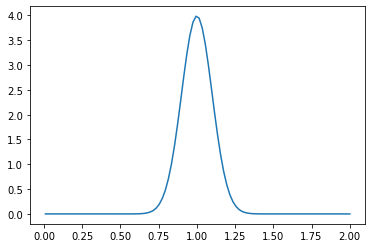

In [41]:
x = np.linspace(0.01, 2, num=100)

base = stats.norm(1, 0.1)
plt.plot(x, base.pdf(x))

print('sum under graph:', np.trapz(base.pdf(x), x))

## Transformation

As we apply $f(x) = y = 2x$ we see that the result of the transformation doesn't suffice the requirements of a probability distribution, as $\int P(y)dy \neq 1$

2.0

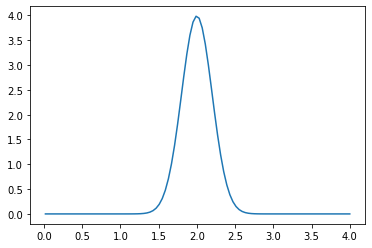

In [42]:
def f(x):
    return 2*x


y = f(x)
transformed = base.pdf(x)
plt.plot(y, transformed)

np.trapz(transformed, y)

# Change of variables


The transformation $f(x) = y$ blows up or shrinks the area/ volume of the distribution, so we need to determine a transformation so that:


$$ 
\begin{eqnarray}
\int P(x)dx &=&\int P(y)dy = 1 \\
P(x)dx &=&P(y)dy \\
P(y) &=&P(x)\frac{dx}{dy}
\end{eqnarray} $$

So to keep an integral of 1 for $P(y)$ (the definition of a probability distribution), we need to multiply $P(x)$ with its derivative w.r.t. $y$.
Therefore we need to express $x$ in $y$. This can be done if we only have invertible transformations.

$$\begin{eqnarray}
f(x) &=& y \\
f^{-1}(y) &=& x
\end{eqnarray} $$

$$\begin{eqnarray}
 P(y) &=& P(x)\frac{\text{d}f^{-1}(y)}{\text{d}y} \\
 &=& P(x)f'^{-1}(y) \\
 &=& P(f^{-1}(y))f'^{-1}(y)
\end{eqnarray} $$

1.0

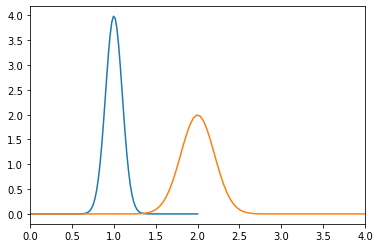

In [44]:
def f_i(y):
    return y*0.5

def f_i_prime(y):
    return 0.5

assert np.allclose(f_i(f(x)),  x)

y = f(x)
px = base.pdf(x)
transformed = base.pdf(f_i(y)) * f_i_prime(y)

plt.plot(x, px)
plt.plot(y, transformed)
plt.xlim(0, 4)

np.trapz(transformed, y)

--------------------------------------------------

3.0304040506070815

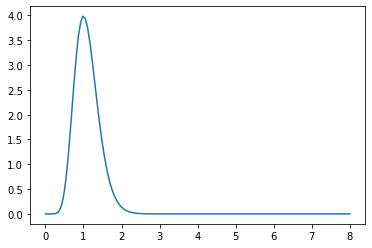

In [45]:
def f(x):
    return x**3


y = f(x)
transformed = base.pdf(x)
plt.plot(y, transformed)

np.trapz(transformed, y)

1.000138941643109

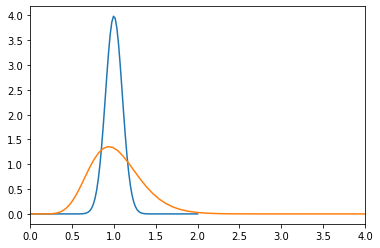

In [47]:
def f_i(y):
    return y**(1./3)

def f_i_prime(y):
    return (1./3)*y**(-2./3)

assert np.allclose(f_i(f(x)),  x)

y = f(x)
px = base.pdf(x)

transformed = base.pdf(f_i(y)) * f_i_prime(y)

plt.plot(x, px)
plt.plot(y, transformed)
plt.xlim(0, 4)

np.trapz(transformed, y)

## Multiple dimensions
In N-dimension $\frac{dx}{dy}$ is expressed in the Jacobian matrix, i.e. the matrix with first order partial derivatives $\frac{\partial(x)}{\partial{y}}=\mathbf{J}$. This absolute value, is now a determinant, such that;

$$ 
\begin{eqnarray}
P(y)&=&P(f^{-1}(y)) \cdot \left| \det \frac{\partial{ f(y)^{-1} }}{\partial{y}} \right| \\
\end{eqnarray}
$$

The geometric meaning of the determinant is a scaling factor. $\det A$ tells us how much an n-dimensional volume is scaled by applying the transformation of $A$.